In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1,fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [3]:
multinomial.Multinomial(10,fair_probs).sample()

tensor([3., 1., 2., 1., 0., 3.])

In [5]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # Relative frequency as the estimate

tensor([0.1580, 0.1760, 0.1640, 0.1650, 0.1590, 0.1780])

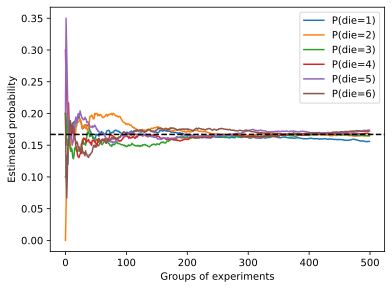

In [6]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1,keepdims=True)
d2l.set_figsize((6,4.5))
for i in range(6):
  d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

Likewise, two random variables $A$ and $B$ are *conditionally independent* given another random variable $C$
if and only if $P(A, B \mid C) = P(A \mid C)P(B \mid C)$. This is expressed as $A \perp B \mid C$.
Why?????

To summarize key characteristics of probability distributions,
we need some measures.
The *expectation* (or average) of the random variable $X$ is denoted as

$$E[X] = \sum_{x} x P(X = x).$$

When the input of a function $f(x)$ is a random variable drawn from the distribution $P$ with different values $x$,
the expectation of $f(x)$ is computed as

$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$$


In many cases we want to measure by how much the random variable $X$ deviates from its expectation. This can be quantified by the variance

$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$$

Why???

Its square root is called the *standard deviation*.
The variance of a function of a random variable measures
by how much the function deviates from the expectation of the function,
as different values $x$ of the random variable are sampled from its distribution:

$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$

